# **Welcome to our project report! ✨🧪**
## 🚀 *Overview*
This notebook presents an analysis of our pKa prediction package. 

## 🤯 *Acquiring Dataset*
In a first step, we will acquire the [pKa dataset](https://github.com/cbio3lab/pKa/blob/main/Data/test_acids_bases_descfinal_nozwitterions.csv) from cbio3lab's repository, initially extracted from the Harvard [dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6A67L9).

Next, we will perform an exploratory analysis of the collected dataset.

1) Let's download the data directly into your working directory:

In [52]:
import requests

# Correct raw file URL
url = "https://raw.githubusercontent.com/anastasiafloris/pKaPredict/main/data/pkadatasetRAWDATA.csv"
file_name = "pkadatasetRAWDATA.csv"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an error if the request fails

    # Check if the content is an HTML page (meaning it's the wrong link)
    if "<!DOCTYPE html>" in response.text:
        print("❌ Error: This is an HTML page, not the CSV file. Check your URL.")
    else:
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"✅ File downloaded successfully: {file_name}")

except requests.exceptions.RequestException as e:
    print(f"❌ Failed to download file: {e}")

✅ File downloaded successfully: pkadatasetRAWDATA.csv


2) Let's open the file and verify its existence as well as display a preview of the latter:

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define the current working directory
current_directory = Path.cwd()
print("Current Directory:", current_directory.resolve())

# Specify the path to the dataset file
file_path = current_directory / "pkadatasetRAWDATA.csv"

# Verify the file's existence and read its contents if available
if file_path.exists():
    print("The dataset file exists. Reading the file contents...\n")
    
    # Open and display the contents (optional, for verification)
    with file_path.open("r") as file:
        content = file.read()
        print(content[:100])  # Print only the first 500 characters for preview
    
    # Load the dataset using pandas
    try:
        data_pka = pd.read_csv(file_path, delimiter=",")  # Adjust delimiter if necessary
        print("\nDataset successfully loaded. Preview:")
        
        # Display interactive scrollable table in VS Code/Jupyter
        from IPython.display import display
        display(data_pka.head(10))  # Display first 50 rows as an interactive scrollable table
        
    except Exception as e:
        print(f"Error loading dataset: {e}")

else:
    print("Error: The specified file does not exist.")



Current Directory: /Users/anastasiafloris/Desktop/pKaPredict/pKaPredict/notebooks
The dataset file exists. Reading the file contents...

Compound,set,Smiles,pka,prot_smiles,deprot_smiles,acid_base_type,acid_base_string,prot_charge,deprot

Dataset successfully loaded. Preview:


,Compound,set,Smiles,pka,prot_smiles,deprot_smiles,acid_base_type,acid_base_string,prot_charge,deprot_charge,...,ATSm5,ATSc1,ATSc2,ATSc3,ATSc4,ATSc5,nHBDon,nHBAcc,bpol,apol
0,4,test,Brc1ccc(-c2nn[nH]n2)cc1,3.73,Brc1ccc(-c2nn[nH]n2)cc1,Brc1ccc(-c2nn[n-]n2)cc1,acidic,A,0,-1,...,16.982131,0.092406,-0.049547,0.007228,0.005439,0.003309,1,3,7.416035,23.103965
1,6,test,Brc1ccc(C2NCCS2)cc1,5.05,Brc1ccc(C2NCCS2)cc1,Brc1ccc(C2[NH2+]CCS2)cc1,basic,B,1,0,...,19.324610,0.106754,-0.072082,0.017678,0.005596,0.000479,1,1,15.162070,29.557930
2,7,test,Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1,7.00,Brc1ccc(Cc2c3ccccc3[nH+]c3ccccc23)cc1,Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1,basic,B,1,0,...,37.151221,0.092960,-0.041298,-0.013032,0.016142,-0.007716,0,1,17.914898,48.685102
3,18,test,Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1,11.30,Brc1cccc(Br)c1N(C1=[NH+]CCN1)C1CCCCC1,Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1,basic,B,1,0,...,111.835963,0.239813,-0.173828,0.098983,-0.044103,-0.071317,1,3,27.310933,48.469067
4,21,test,Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1,10.90,Brc1cccc(Br)c1N(CC1CCCC1)C1=[NH+]CCN1,Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1,basic,B,1,0,...,108.669781,0.241317,-0.177460,0.105635,-0.051910,-0.065520,1,3,27.310933,48.469067
5,29,test,Brc1ccccc1-c1nn[nH]n1,3.83,Brc1ccccc1-c1nn[nH]n1,Brc1ccccc1-c1nn[n-]n1,acidic,A,0,-1,...,32.498591,0.094127,-0.044870,0.013413,-0.036348,0.020900,1,3,7.416035,23.103965
6,35,test,Brc1cncc2ccccc12,3.54,Brc1c[nH+]cc2ccccc12,Brc1cncc2ccccc12,basic,B,1,0,...,26.290390,0.098522,-0.045892,-0.022079,0.028567,-0.009850,0,1,9.169242,23.990758
7,41,test,C#CC(C)(C)N(C)C(C)(C)C#C,6.65,C#CC(C)(C)N(C)C(C)(C)C#C,C#CC(C)(C)[NH+](C)C(C)(C)C#C,basic,B,1,0,...,13.000000,0.106850,-0.074848,0.023127,0.002903,-0.004919,0,1,20.564519,31.795481
8,52,test,C#CCCCC(=O)O,4.60,C#CCCCC(=O)O,C#CCCCC(=O)[O-],acidic,A,0,-1,...,4.664184,0.204948,-0.094349,0.010163,0.004949,-0.056982,1,2,9.703656,17.498344
9,62,test,C#CCCN,9.23,C#CCC[NH3+],C#CCCN,basic,B,1,0,...,1.166182,0.047694,-0.010408,-0.023484,0.008209,0.001837,1,1,6.992449,12.807551


## 🧹 *Cleaning Dataset*

✅ Prints initial dataset shape <br> 
✅ Counts and removes missing values (NaN) and duplicates <br>
✅ Prints final dataset shape after cleaning  <br>
✅ Generates a histogram to visualize pKa value distribution  <br>

✅ Dataset successfully loaded.

🔹 Checking dataset information:
Initial dataset shape: (1297, 274)

Missing values before cleaning:
Smiles            0
pka               0
acid_base_type    0
dtype: int64

Total missing values in 'pka': 0

Total duplicate rows removed: 0
Dataset shape after NaN and duplicate removal: (1297, 3)

📊 Generating histogram for pKa distribution...



/var/folders/2_/hhyxw_9j6nz8m3_j_d3465r80000gn/T/ipykernel_20953/3707956249.py:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2_/hhyxw_9j6nz8m3_j_d3465r80000gn/T/ipykernel_20953/3707956249.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



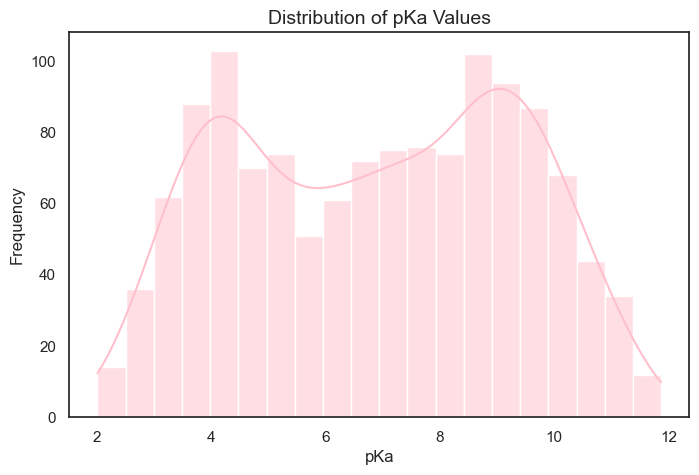

,Smiles,pka,acid_base_type
0,Brc1ccc(-c2nn[nH]n2)cc1,3.73,acidic
1,Brc1ccc(C2NCCS2)cc1,5.05,basic
2,Brc1ccc(Cc2c3ccccc3nc3ccccc23)cc1,7.00,basic
3,Brc1cccc(Br)c1N(C1=NCCN1)C1CCCCC1,11.30,basic
4,Brc1cccc(Br)c1N(CC1CCCC1)C1=NCCN1,10.90,basic
...,...,...,...
1292,O=C(O)c1nc(Cl)ccc1Cl,2.32,acidic
1293,O=C1CCCN1CC#CCN1CCCC1,8.40,basic
1294,NCCCCS(=O)(=O)c1ccccc1,10.00,basic
1295,NCCSc1ccccc1,9.00,basic


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = os.path.join("..", "data", "pkadatasetRAWDATA.csv")

try:
    data_pka = pd.read_csv(file_path, sep=None, engine="python")  # Auto-detect delimiter
    print("✅ Dataset successfully loaded.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    data_pka = None

# Function to clean, remove duplicates, and visualize pKa distribution
def clean_and_visualize_pka(data_pka):
    """Cleans dataset by removing NaN values, duplicates, and visualizes pKa distribution."""
    
    if data_pka is None or data_pka.empty:
        print("❌ Error: Dataset is empty or not loaded.")
        return

    # Check initial shape
    print("\n🔹 Checking dataset information:")
    print(f"Initial dataset shape: {data_pka.shape}")

    # Ensure necessary columns exist
    required_columns = {"Smiles", "pka", "acid_base_type"}
    missing_columns = required_columns - set(data_pka.columns)
    if missing_columns:
        print(f"❌ Error: Missing required columns: {missing_columns}")
        return None
    
    # Select only the relevant columns
    data_pka = data_pka[list(required_columns)]
    
    # Check for missing values
    missing_values = data_pka.isnull().sum()
    print(f"\nMissing values before cleaning:\n{missing_values}")
    

    # Ensure "pka" column exists (case-sensitive)
    if "pka" not in data_pka.columns:
        print("❌ Error: 'pka' column not found in dataset.")
        return
    
    # Check for missing values
    missing_values = data_pka["pka"].isnull().sum()
    print(f"\nTotal missing values in 'pka': {missing_values}")

    # Drop NaN values
    data_pka.dropna(subset=["pka"], inplace=True)

    # Remove duplicates
    initial_rows = data_pka.shape[0]
    data_pka.drop_duplicates(inplace=True)
    final_rows = data_pka.shape[0]
    duplicates_removed = initial_rows - final_rows
    print(f"\nTotal duplicate rows removed: {duplicates_removed}")

    
    # Check final shape after cleaning
    print(f"Dataset shape after NaN and duplicate removal: {data_pka.shape}")

    # Generate histogram for pKa distribution
    print("\n📊 Generating histogram for pKa distribution...\n")

    # Set white background (removes grey Seaborn style)
    sns.set_theme(style="white")

    plt.figure(figsize=(8, 5))
    sns.histplot(data=data_pka, x="pka", binwidth=0.5, kde=True, color="pink")  # Pink color

    # Improve visual appearance
    plt.xlabel("pKa", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Distribution of pKa Values", fontsize=14)
    plt.grid(False)  # Removes any unwanted grid lines

    plt.show()

    return data_pka  # Return cleaned dataset for further processing

# Call the function
clean_and_visualize_pka(data_pka)

### 🛟 *Saving the cleaned data to a CSV file*

✅ Dataset successfully loaded.

🔹 Checking dataset information:
Initial dataset shape: (1297, 274)

Missing values before cleaning:
Smiles            0
pka               0
acid_base_type    0
dtype: int64

Total duplicate rows removed: 0
Dataset shape after NaN and duplicate removal: (1297, 3)

📊 Generating histogram for pKa distribution...



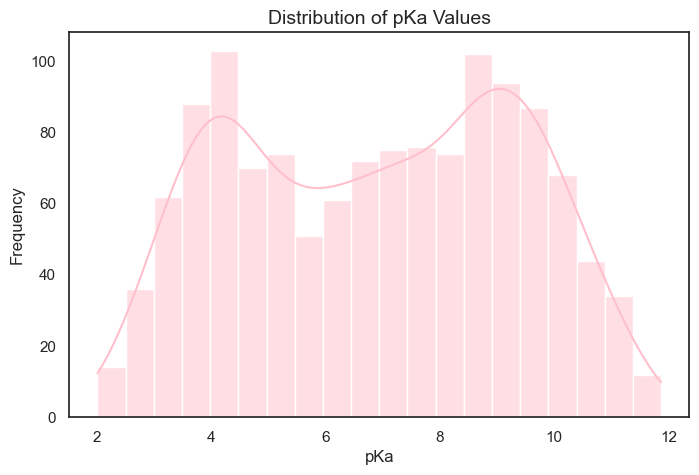

✅ Cleaned dataset successfully saved at: ../data/pKadata_cleaned.csv


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = os.path.join("..", "data", "pkadatasetRAWDATA.csv")

try:
    data_pka = pd.read_csv(file_path, sep=None, engine="python")  # Auto-detect delimiter
    print("✅ Dataset successfully loaded.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    data_pka = None

# Function to clean, remove duplicates, and visualize pKa distribution
def clean_and_visualize_pka(data_pka):
    """Cleans dataset by selecting relevant columns, removing NaN values, duplicates, and visualizing pKa distribution."""
    
    if data_pka is None or data_pka.empty:
        print("❌ Error: Dataset is empty or not loaded.")
        return None

    # Check initial shape
    print("\n🔹 Checking dataset information:")
    print(f"Initial dataset shape: {data_pka.shape}")

    # Ensure necessary columns exist
    required_columns = {"Smiles", "pka", "acid_base_type"}
    missing_columns = required_columns - set(data_pka.columns)
    if missing_columns:
        print(f"❌ Error: Missing required columns: {missing_columns}")
        return None
    
    # Select only the relevant columns and create a copy
    data_pka = data_pka[list(required_columns)].copy()
    
    # Check for missing values
    missing_values = data_pka.isnull().sum()
    print(f"\nMissing values before cleaning:\n{missing_values}")
    
    # Drop NaN values
    data_pka.dropna(subset=["pka"], inplace=True)

    # Remove duplicates
    initial_rows = data_pka.shape[0]
    data_pka.drop_duplicates(inplace=True)
    final_rows = data_pka.shape[0]
    duplicates_removed = initial_rows - final_rows
    print(f"\nTotal duplicate rows removed: {duplicates_removed}")
    
    # Check final shape after cleaning
    print(f"Dataset shape after NaN and duplicate removal: {data_pka.shape}")

    # Generate histogram for pKa distribution
    print("\n📊 Generating histogram for pKa distribution...\n")

    sns.set_theme(style="white")

    plt.figure(figsize=(8, 5))
    sns.histplot(data=data_pka, x="pka", binwidth=0.5, kde=True, color="pink")

    plt.xlabel("pKa", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Distribution of pKa Values", fontsize=14)
    plt.grid(False)

    plt.show()

    return data_pka  # Return cleaned dataset for saving

# Call the function
cleaned_data = clean_and_visualize_pka(data_pka)

# Save the cleaned dataset to the correct folder inside your package
if cleaned_data is not None:
    save_path = os.path.join("..", "data", "pKadata_cleaned.csv")  # Ensure the correct path

    # Create the folder if it doesn't exist
    os.makedirs("data", exist_ok=True)

    # Save as CSV
    cleaned_data.to_csv(save_path, index=False)
    print(f"✅ Cleaned dataset successfully saved at: {save_path}")

